In [188]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [204]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0


### Visualize/Explore Data - If You Want, You Do You

In [190]:
dfP = df[df["not.fully.paid"] == 1]
dfN = df[df["not.fully.paid"] == 0]

print(dfP["log.annual.inc"].describe())
print(dfN["log.annual.inc"].describe())


count    1533.000000
mean       10.885023
std         0.666718
min         7.600902
25%        10.491274
50%        10.878047
75%        11.276633
max        13.458836
Name: log.annual.inc, dtype: float64
count    8045.000000
mean       10.941091
std         0.604045
min         7.547502
25%        10.584056
50%        10.933178
75%        11.304720
max        14.528354
Name: log.annual.inc, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

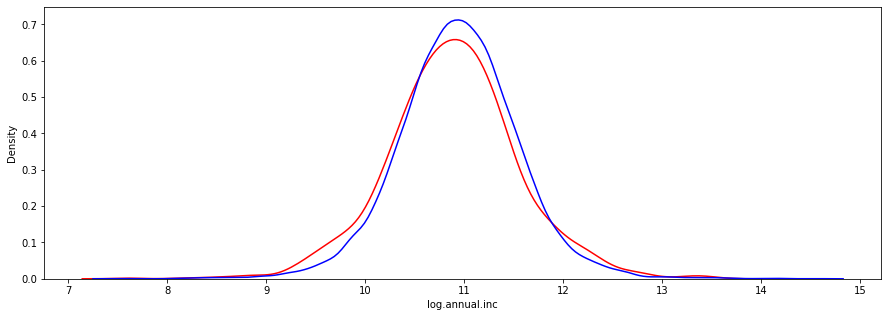

In [191]:
sns.distplot(dfP["log.annual.inc"], color="red", hist=False)
sns.distplot(dfN["log.annual.inc"], color="blue", hist=False)

In [192]:
dfCp = df[df["credit.policy"] == 1]
dfNp = df[df["credit.policy"] == 0]

print(dfCp["log.annual.inc"].describe())
print(dfNp["log.annual.inc"].describe())


count    7710.000000
mean       10.942680
std         0.585371
min         8.294050
25%        10.596535
50%        10.933107
75%        11.289819
max        14.528354
Name: log.annual.inc, dtype: float64
count    1868.000000
mean       10.888520
std         0.722315
min         7.547502
25%        10.463103
50%        10.896739
75%        11.314475
max        13.458836
Name: log.annual.inc, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

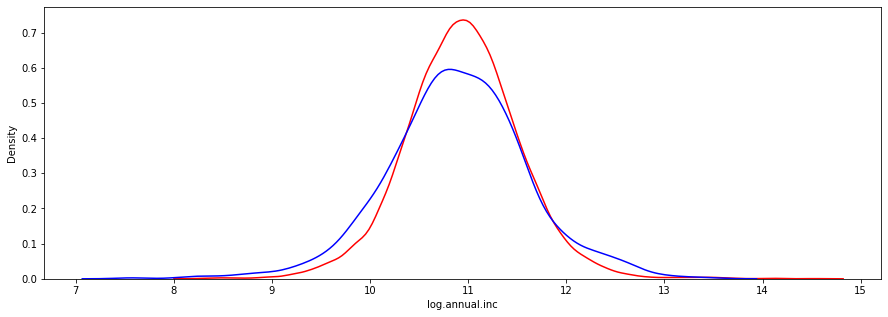

In [193]:
sns.distplot(dfCp["log.annual.inc"], color="red", hist=False)
sns.distplot(dfNp["log.annual.inc"], color="blue", hist=False)

In [194]:
dfCp = df[df["credit.policy"] == 1]
dfNp = df[df["credit.policy"] == 0]

dPG = dfCp["log.annual.inc"]
dNPG = dfNp["log.annual.inc"]

gp, gNP = dPG.mean(), dNPG.mean()
print("Mean:",gp, gNP)
gDiff = abs(gp - gNP)
print("Diff:",gDiff)

print("Var:",dPG.var(),dNPG.var())
statP, pvalP = ss.ttest_ind(dPG, dNPG)
print("ttest:",statP, pvalP)

statM, pvalM = ss.mannwhitneyu(dPG, dNPG)
print("mannwhitneyu:",statM, pvalM)

pCount, nCount = dPG.count(), dNPG.count()
print("Count 1:",pCount)
print("Count 2:",nCount)

print("STD:", dPG.std(), dNPG.std())

Mean: 10.942680001295294 10.888519880012797
Diff: 0.054160121282496476
Var: 0.3426588276966834 0.521739550359756
ttest: 3.4178817682392073 0.0006337324172012597
mannwhitneyu: 7509587.0 0.00401598466030178
Count 1: 7710
Count 2: 1868
STD: 0.5853706754669927 0.7223154091944571


In [195]:
#Statsmodels calculation of power. 
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dPG, dNPG)
alpha = .05
nobs = pCount + nCount

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, 0.08813984185782714)

In [196]:
n = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n, nobs

(1157.6455504969408, 9578)

In [198]:
a = thinkstats2.PearsonMedianSkewness(df["log.annual.inc"])
b = thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"])
c = thinkstats2.PearsonMedianSkewness(df["fico"])

a, b, c

(0.01892942352196182, 0.5056178217400077, 0.30390788935426843)

In [199]:
dE = df[df["fico"] >=800] 
dE = df[df["fico"] <=850]

dV = df[df["fico"] >=740] 
dV = df[df["fico"] <=799]  

dG = df[df["fico"] >=670] 
dG = df[df["fico"] <=739] 

dA = df[df["fico"] >=580] 
dA = df[df["fico"] <=669] 

dP = df[df["fico"] >=300] 
dP = df[df["fico"] <=579]


dO = df[df["fico"] >=670] 
dO = df[df["fico"] <=850]

df["log.annual.inc"].describe()


count    9578.000000
mean       10.932117
std         0.614813
min         7.547502
25%        10.558414
50%        10.928884
75%        11.291293
max        14.528354
Name: log.annual.inc, dtype: float64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='fico', ylabel='Density'>

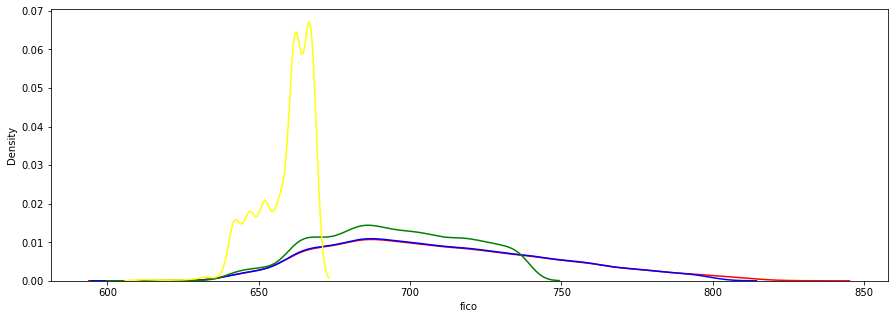

In [200]:
sns.distplot(dE["fico"], color="red", hist=False)
sns.distplot(dV["fico"], color="blue", hist=False)
sns.distplot(dG["fico"], color="green", hist=False)
sns.distplot(dA["fico"], color="yellow", hist=False)
sns.distplot(dP["fico"], color="black", hist=False)


In [214]:
print(thinkstats2.SpearmanCorr(df["fico"], df["log.annual.inc"]), thinkstats2.Corr(df["fico"], df["log.annual.inc"]))
print(thinkstats2.SpearmanCorr(df["fico"], df["int.rate"]), thinkstats2.Corr(df["fico"], df["int.rate"]))
print(thinkstats2.SpearmanCorr(df["fico"], df["revol.util"]), thinkstats2.Corr(df["fico"], df["revol.util"]))

0.10787785096258333 0.11457595272479308
-0.7449861174898882 -0.7148207714193593
-0.5200854949579616 -0.54128933500756


## Solutions